### Import your libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Load your dataset

In [2]:
miss = pd.read_csv('HR_Missing_Values.csv')


### Explore your data 

* First 5 recods.
* Last 5 records. 
* Check data types.
* Show statistical summary.
* Is there any missing values?
* Applay two more data analysis from your choose.

In [3]:
miss.head()

,Employee_Name,EmpID,Salary,PositionID,Position,DOB,Sex,MaritalDesc,RaceDesc,DateofHire,DateofTermination,Department,ManagerName,ManagerID,RecruitmentSource,Absences
0,"Adinolfi, Wilson K",10026,62506.0,19,Production Technician I,07/10/83,M,Single,White,7/5/2011,NaN,Production,Michael Albert,22.0,LinkedIn,1.0
1,"Ait Sidi, Karthikeyan",10084,104437.0,27,Sr. DBA,05/05/75,M,Married,White,3/30/2015,6/16/2016,IT/IS,Simon Roup,4.0,Indeed,17.0
2,"Akinkuolie, Sarah",10196,64955.0,20,Production Technician II,09/19/88,F,Married,White,7/5/2011,9/24/2012,Production,Kissy Sullivan,20.0,LinkedIn,3.0
3,"Alagbe,Trina",10088,64991.0,19,Production Technician I,NaN,F,Married,White,1/7/2008,NaN,Production,Elijiah Gray,16.0,Indeed,15.0
4,NaN,10069,50825.0,19,Production Technician I,09/08/89,F,Divorced,White,7/11/2011,9/6/2016,Production,Webster Butler,39.0,Google Search,2.0


In [4]:
miss.tail()

,Employee_Name,EmpID,Salary,PositionID,Position,DOB,Sex,MaritalDesc,RaceDesc,DateofHire,DateofTermination,Department,ManagerName,ManagerID,RecruitmentSource,Absences
306,"Woodson, Jason",10135,65893.0,20,Production Technician II,05/11/85,M,Single,White,7/7/2014,NaN,Production,Kissy Sullivan,20.0,LinkedIn,13.0
307,"Ybarra, Catherine",10301,48513.0,19,Production Technician I,NaN,F,Single,Asian,9/2/2008,9/29/2015,Production,Brannon Miller,12.0,Google Search,4.0
308,NaN,10010,220450.0,6,CIO,NaN,F,Single,White,4/10/2010,NaN,IT/IS,Janet King,2.0,Employee Referral,16.0
309,"Zhou, Julia",10043,89292.0,9,Data Analyst,02/24/79,F,Single,White,3/30/2015,NaN,IT/IS,Simon Roup,4.0,Employee Referral,NaN
310,NaN,10271,45046.0,19,Production Technician I,08/17/78,F,Widowed,Asian,9/29/2014,NaN,Production,David Stanley,14.0,LinkedIn,2.0


In [5]:
miss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employee_Name      218 non-null    object 
 1   EmpID              311 non-null    int64  
 2   Salary             249 non-null    float64
 3   PositionID         311 non-null    int64  
 4   Position           311 non-null    object 
 5   DOB                280 non-null    object 
 6   Sex                249 non-null    object 
 7   MaritalDesc        311 non-null    object 
 8   RaceDesc           311 non-null    object 
 9   DateofHire         311 non-null    object 
 10  DateofTermination  104 non-null    object 
 11  Department         311 non-null    object 
 12  ManagerName        311 non-null    object 
 13  ManagerID          303 non-null    float64
 14  RecruitmentSource  311 non-null    object 
 15  Absences           280 non-null    float64
dtypes: float64(3), int64(2), o

In [6]:
miss.shape

(311, 16)

In [7]:
miss.describe()

,EmpID,Salary,PositionID,ManagerID,Absences
count,311.000000,249.000000,311.000000,303.000000,280.000000
mean,10156.000000,67972.662651,16.845659,14.570957,10.128571
std,89.922189,22995.908395,6.223419,8.078306,5.946407
min,10001.000000,45046.000000,1.000000,1.000000,1.000000
25%,10078.500000,55315.000000,18.000000,10.000000,4.750000
50%,10156.000000,62957.000000,19.000000,15.000000,10.000000
75%,10233.500000,71707.000000,20.000000,19.000000,15.250000
max,10311.000000,220450.000000,30.000000,39.000000,20.000000


In [8]:
miss.isnull().sum()

Employee_Name         93
EmpID                  0
Salary                62
PositionID             0
Position               0
DOB                   31
Sex                   62
MaritalDesc            0
RaceDesc               0
DateofHire             0
DateofTermination    207
Department             0
ManagerName            0
ManagerID              8
RecruitmentSource      0
Absences              31
dtype: int64

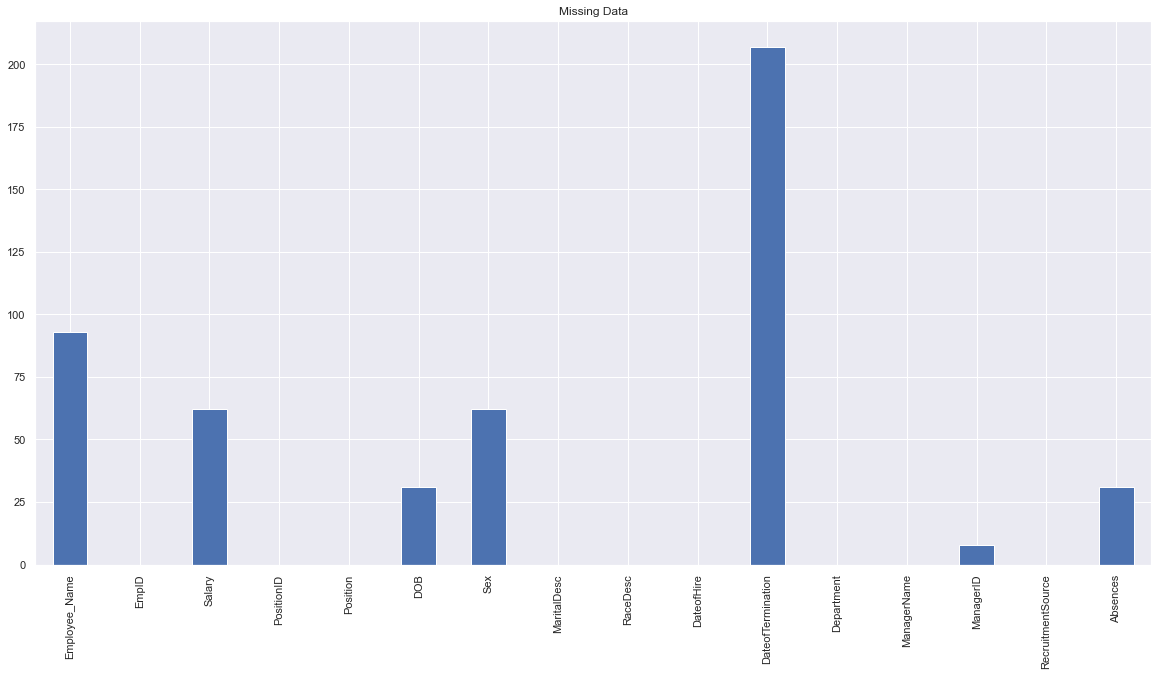

In [9]:
sns.set(rc = {'figure.figsize':(20,10)})
miss.isnull().sum().plot(kind="bar", title="Missing Data");

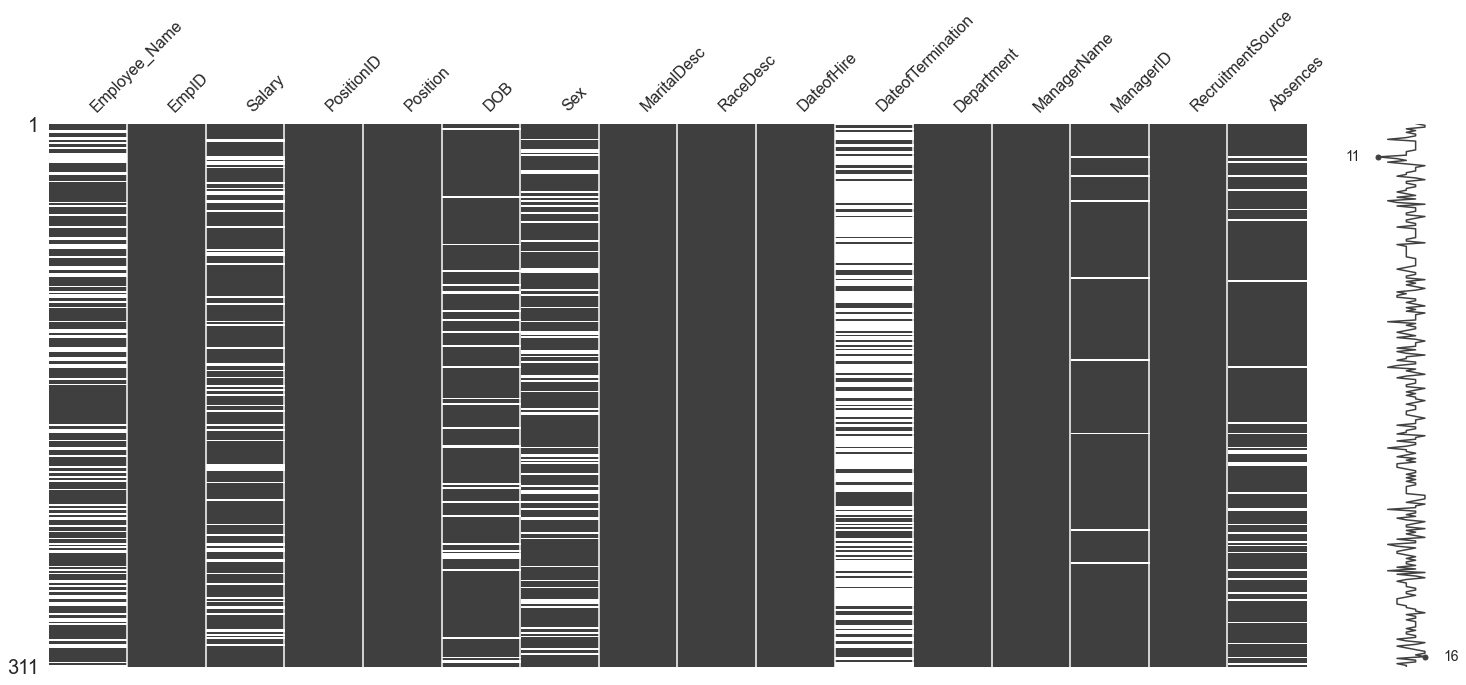

In [10]:
import missingno as msno
msno.matrix(miss);

### Do the following steps for each column with missing values.
* Identity the column.
* How much precentage the missing value represents?
* What is the best way to handle these missing values and why?
* Apply your method to the column.

In [11]:
null_columns = miss.columns[miss.isnull().any()]
null_columns

Index(['Employee_Name', 'Salary', 'DOB', 'Sex', 'DateofTermination',
       'ManagerID', 'Absences'],
      dtype='object')

In [12]:
miss_null_columns = miss[null_columns]
miss_null_columns

,Employee_Name,Salary,DOB,Sex,DateofTermination,ManagerID,Absences
0,"Adinolfi, Wilson K",62506.0,07/10/83,M,NaN,22.0,1.0
1,"Ait Sidi, Karthikeyan",104437.0,05/05/75,M,6/16/2016,4.0,17.0
2,"Akinkuolie, Sarah",64955.0,09/19/88,F,9/24/2012,20.0,3.0
3,"Alagbe,Trina",64991.0,NaN,F,NaN,16.0,15.0
4,NaN,50825.0,09/08/89,F,9/6/2016,39.0,2.0
...,...,...,...,...,...,...,...
306,"Woodson, Jason",65893.0,05/11/85,M,NaN,20.0,13.0
307,"Ybarra, Catherine",48513.0,NaN,F,9/29/2015,12.0,4.0
308,NaN,220450.0,NaN,F,NaN,2.0,16.0
309,"Zhou, Julia",89292.0,02/24/79,F,NaN,4.0,NaN


In [40]:
x = miss.dropna(subset=['Employee_Name'])
x

,Employee_Name,EmpID,Salary,PositionID,Position,DOB,Sex,MaritalDesc,RaceDesc,DateofHire,DateofTermination,Department,ManagerName,ManagerID,RecruitmentSource,Absences
0,"Adinolfi, Wilson K",10026,62506.0,19,Production Technician I,07/10/83,M,Single,White,7/5/2011,NaN,Production,Michael Albert,22.0,LinkedIn,1.0
1,"Ait Sidi, Karthikeyan",10084,104437.0,27,Sr. DBA,05/05/75,M,Married,White,3/30/2015,6/16/2016,IT/IS,Simon Roup,4.0,Indeed,17.0
2,"Akinkuolie, Sarah",10196,64955.0,20,Production Technician II,09/19/88,F,Married,White,7/5/2011,9/24/2012,Production,Kissy Sullivan,20.0,LinkedIn,3.0
3,"Alagbe,Trina",10088,64991.0,19,Production Technician I,NaN,F,Married,White,1/7/2008,NaN,Production,Elijiah Gray,16.0,Indeed,15.0
6,"Andreola, Colby",10194,95660.0,24,Software Engineer,05/24/79,F,Single,White,11/10/2014,NaN,Software Engineering,Alex Sweetwater,10.0,LinkedIn,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,"Winthrop, Jordan",10033,70507.0,20,Production Technician II,11/07/58,M,Single,White,1/7/2013,2/21/2016,Production,Brannon Miller,12.0,LinkedIn,7.0
305,"Wolk, Hang T",10174,60446.0,20,Production Technician II,NaN,F,Single,White,9/29/2014,NaN,Production,David Stanley,14.0,LinkedIn,NaN
306,"Woodson, Jason",10135,65893.0,20,Production Technician II,05/11/85,M,Single,White,7/7/2014,NaN,Production,Kissy Sullivan,20.0,LinkedIn,13.0
307,"Ybarra, Catherine",10301,48513.0,19,Production Technician I,NaN,F,Single,Asian,9/2/2008,9/29/2015,Production,Brannon Miller,12.0,Google Search,4.0


In [35]:
grouped_data = pd.DataFrame(miss.groupby(['Position', 'Department']))
grouped_data


,0,1
0,"(Accountant I, Admin Offices)",Employee_Name EmpID Salary Pos...
1,"(Administrative Assistant, Admin Offices)",Employee_Name EmpID Salary Positio...
2,"(Area Sales Manager, Sales)",Employee_Name EmpID Salary P...
3,"(BI Developer, IT/IS)",Employee_Name EmpID Salary Position...
4,"(BI Director, IT/IS)",Employee_Name EmpID Salary Positi...
5,"(CIO, IT/IS)",Employee_Name EmpID Salary PositionID...
6,"(Data Analyst, IT/IS)",Employee_Name EmpID Salary Positio...
7,"(Data Analyst , IT/IS)",Employee_Name EmpID Salary PositionID ...
8,"(Data Architect, IT/IS)",Employee_Name EmpID Salary PositionID ...
9,"(Database Administrator, IT/IS)",Employee_Name EmpID Salary Posit...


In [41]:
grouped_data = x.groupby(['Position', 'Department'])
mean_salaries = grouped_data['Salary'].mean()

for index, row in x.iterrows():
    if pd.isnull(row['Salary']):
        position = row['Position']
        department = row['Department']
    
        if position in mean_salaries and department in mean_salaries[position]:
            x.at[index, 'Salary'] = mean_salaries[position][department]
x.isnull().sum()

Employee_Name          0
EmpID                  0
Salary                 5
PositionID             0
Position               0
DOB                   22
Sex                   42
MaritalDesc            0
RaceDesc               0
DateofHire             0
DateofTermination    138
Department             0
ManagerName            0
ManagerID              6
RecruitmentSource      0
Absences              24
dtype: int64

In [86]:
xx = x.dropna(subset=['Salary'])
xx.isnull().sum()

Employee_Name          0
EmpID                  0
Salary                 0
PositionID             0
Position               0
DOB                   22
Sex                   42
MaritalDesc            0
RaceDesc               0
DateofHire             0
DateofTermination    135
Department             0
ManagerName            0
ManagerID              6
RecruitmentSource      0
Absences              24
dtype: int64

In [88]:
mode_sex = xx['Sex'].mode().iloc[0]
xx['Sex'].fillna(mode_sex, inplace=True)
xx.isnull().sum()

Employee_Name          0
EmpID                  0
Salary                 0
PositionID             0
Position               0
DOB                   22
Sex                    0
MaritalDesc            0
RaceDesc               0
DateofHire             0
DateofTermination    135
Department             0
ManagerName            0
ManagerID              6
RecruitmentSource      0
Absences              24
dtype: int64

In [89]:
xx = xx.dropna(subset=['ManagerID'])


Employee_Name          0
EmpID                  0
Salary                 0
PositionID             0
Position               0
DOB                   22
Sex                    0
MaritalDesc            0
RaceDesc               0
DateofHire             0
DateofTermination    129
Department             0
ManagerName            0
ManagerID              0
RecruitmentSource      0
Absences              22
dtype: int64

In [91]:
mean_absences = xx['Absences'].mean()
xx['Absences'].fillna(mean_absences, inplace=True)
xx.isnull().sum()

Employee_Name          0
EmpID                  0
Salary                 0
PositionID             0
Position               0
DOB                   22
Sex                    0
MaritalDesc            0
RaceDesc               0
DateofHire             0
DateofTermination    129
Department             0
ManagerName            0
ManagerID              0
RecruitmentSource      0
Absences               0
dtype: int64

In [94]:
xx.DateofTermination.fillna('Not Terminated', inplace=True)
xx.isnull().sum()

Employee_Name         0
EmpID                 0
Salary                0
PositionID            0
Position              0
DOB                  22
Sex                   0
MaritalDesc           0
RaceDesc              0
DateofHire            0
DateofTermination     0
Department            0
ManagerName           0
ManagerID             0
RecruitmentSource     0
Absences              0
dtype: int64

In [95]:
xx["DOB"] = xx["DOB"].fillna(method="ffill")
xx.isnull().sum()

Employee_Name        0
EmpID                0
Salary               0
PositionID           0
Position             0
DOB                  0
Sex                  0
MaritalDesc          0
RaceDesc             0
DateofHire           0
DateofTermination    0
Department           0
ManagerName          0
ManagerID            0
RecruitmentSource    0
Absences             0
dtype: int64